In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv("titanic.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df.insert(loc=12,column='survived',value=df['Survived'])
#Since I am gonna work on 'survived' column as  out put,I woud prefer to place it on the index=-1 of the dataframe.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(columns='Survived',inplace=True)

In [6]:
df.columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

In [7]:
df.shape

(891, 12)

In [8]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [9]:
df.drop(columns=['Name'],inplace=True)
# I assume df["Name"] is  reduntan information during my analysis

In [10]:
df.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [11]:
mapper={"male":0,'female':1}

In [12]:
df["Sex"]=df["Sex"].map(mapper)

In [13]:
df["Ticket"].nunique()

681

In [14]:
df.drop(columns=['Ticket'],inplace=True)
# I figured out there is no way to change or purify the ticket type into useful infomation then is considered it as reduntan info and I did drop it.

In [15]:
df["Cabin"].nunique()

147

In [16]:
df.drop(columns=['Cabin'],inplace=True)

In [17]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
mapper={'S':0,'C':1,'Q':2}

In [19]:
df["Embarked"]=df["Embarked"].map(mapper)

In [20]:
df["Age"].min()
# age below "one" is useless, it can happen due to fat fingers or more precision which I think doesn't make any sense

0.42

In [21]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [22]:
df['Age'][df['Age']<1]=1

C:\Users\Marzi\AppData\Local\Temp\ipykernel_6316\1667356393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age']<1]=1


In [23]:
df["Age"].max()

80.0

In [24]:
group_age_mean=df.groupby(['Sex','Pclass'], sort=False)['Age'].transform('mean' )
#age is gonna play a huge role here, then instead of dropping 'na' values in this column I think it would make more sense to use mean value of each group considering 
#sex and pclass


In [25]:
df['Age'].fillna(group_age_mean,inplace=True)

In [26]:
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.drop(columns=['PassengerId'],inplace=True)

In [29]:
df.shape

(889, 8)

In [30]:
df[df.duplicated()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
47,3,1,21.754902,0,0,7.7500,2.0,1
76,3,0,26.509881,0,0,7.8958,0.0,0
77,3,0,26.509881,0,0,8.0500,0.0,0
87,3,0,26.509881,0,0,8.0500,0.0,0
95,3,0,26.509881,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...
870,3,0,26.000000,0,0,7.8958,0.0,0
877,3,0,19.000000,0,0,7.8958,0.0,0
878,3,0,26.509881,0,0,7.8958,0.0,0
884,3,0,25.000000,0,0,7.0500,0.0,0


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
Survived      int64
dtype: object

In [33]:
df["Embarked"]=df["Embarked"].astype("int64")

In [34]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    778 non-null    int64  
 1   Sex       778 non-null    int64  
 2   Age       778 non-null    float64
 3   SibSp     778 non-null    int64  
 4   Parch     778 non-null    int64  
 5   Fare      778 non-null    float64
 6   Embarked  778 non-null    int64  
 7   Survived  778 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.7 KB


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# Logistic regression

In [37]:
logistic1=LogisticRegression()
logistic1.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
logistic_prediction=logistic1.predict(x_test)


In [39]:
confusion_matrix(y_test,logistic_prediction)

array([[71, 15],
       [22, 48]], dtype=int64)

In [40]:
logistic_accuracy_score=accuracy_score(y_test,logistic_prediction)

In [41]:
logistic_f1_score=f1_score(y_test,logistic_prediction)

In [42]:
logistic_accuracy_score,logistic_f1_score

(0.7628205128205128, 0.7218045112781954)

In [43]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [44]:
#logistic1.predict([[a,b,c,d,e,f,g]])

#  Decision tree

In [45]:
tree1=DecisionTreeClassifier()

In [46]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
tree1_prediction=tree1.predict(x_test)

In [48]:
tree_accuracy_score=accuracy_score(y_test,tree1_prediction)

In [49]:
confusion_matrix(y_test,tree1_prediction)

array([[65, 21],
       [23, 47]], dtype=int64)

In [50]:
tree_f1_score=f1_score(y_test,tree1_prediction)

In [51]:
tree_accuracy_score,tree_f1_score

(0.717948717948718, 0.681159420289855)

In [52]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [53]:
#tree1.predict([[a,b,c,d,e,f,g]])

# Naive Bays

In [54]:
naivebays1=GaussianNB()

In [55]:
naivebays1.fit(x_train,y_train)

GaussianNB()

In [56]:
naivebays_prediction=naivebays1.predict(x_test)

In [57]:
confusion_matrix(y_test,naivebays_prediction)

array([[68, 18],
       [23, 47]], dtype=int64)

In [58]:
naive_accuracy_score=accuracy_score(y_test,naivebays_prediction)

In [59]:
naive_f1_score=f1_score(y_test,naivebays_prediction)

In [60]:
naive_accuracy_score,naive_f1_score

(0.7371794871794872, 0.6962962962962963)

In [61]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [62]:
#naivebays1.predict([[a,b,c,d,e,f,g]])

# Support vector machine

In [63]:
vector1=SVC()

In [64]:
vector1.fit(x_train,y_train)

SVC()

In [65]:
vector1_prediction=vector1.predict(x_test)

In [66]:
confusion_matrix(y_test,vector1_prediction)

array([[81,  5],
       [49, 21]], dtype=int64)

In [67]:
svm_accuracy_score=accuracy_score(y_test,vector1_prediction)

In [68]:
svm_f1_score=f1_score(y_test,vector1_prediction)

In [69]:
svm_accuracy_score,svm_f1_score

(0.6538461538461539, 0.4375)

In [70]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [71]:
#vector1.predict([[a,b,c,d,e,f,g]])

# comparing efficency of diffrent models on tesing data

In [72]:
pd.DataFrame({"model":["logistic","decision tree classifier","naive bays","svm"],
              "accuracy":[logistic_accuracy_score,tree_accuracy_score,naive_accuracy_score,svm_accuracy_score],
              "f1score":[logistic_f1_score,tree_f1_score,naive_f1_score,svm_f1_score]
             
             })

,model,accuracy,f1score
0,logistic,0.762821,0.721805
1,decision tree classifier,0.717949,0.681159
2,naive bays,0.737179,0.696296
3,svm,0.653846,0.437500


summary: base on the dataframe above which shows accuracy and f1score of four machine learning models ;logistic regression somewhat works better!

# % of survinors based on class

In [73]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,38.000000,1,0,71.2833,1,1
2,3,1,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,1
4,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
885,3,1,39.000000,0,5,29.1250,2,0
887,1,1,19.000000,0,0,30.0000,0,1
888,3,1,21.754902,1,2,23.4500,0,0
889,1,0,26.000000,0,0,30.0000,1,1


In [74]:
df.groupby(["Pclass"])["Survived"].count()

Pclass
1    210
2    164
3    404
Name: Survived, dtype: int64

In [75]:
df.groupby(["Pclass"])["Survived"].sum()

Pclass
1    133
2     83
3    104
Name: Survived, dtype: int64

In [76]:
df.groupby(["Pclass"])["Survived"].sum()/df.groupby(["Pclass"])["Survived"].count()

Pclass
1    0.633333
2    0.506098
3    0.257426
Name: Survived, dtype: float64

In [77]:
hot=df[["Pclass","Survived"]]

In [78]:
hot["Pclass"]=hot["Pclass"].astype("object")

C:\Users\Marzi\AppData\Local\Temp\ipykernel_6316\4059224531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot["Pclass"]=hot["Pclass"].astype("object")


In [79]:
hot_with_dummies=pd.get_dummies(hot)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [80]:
hot_with_dummies

,Survived,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1
...,...,...,...,...
885,0,0,0,1
887,1,1,0,0
888,0,0,0,1
889,1,1,0,0


In [81]:
hot_with_dummies.groupby(["Pclass_1","Pclass_2","Pclass_3"])["Survived"].sum()

Pclass_1  Pclass_2  Pclass_3
0         0         1           104
          1         0            83
1         0         0           133
Name: Survived, dtype: int64

In [82]:
hot_with_dummies.groupby(["Pclass_1","Pclass_2","Pclass_3"])["Survived"].count()

Pclass_1  Pclass_2  Pclass_3
0         0         1           404
          1         0           164
1         0         0           210
Name: Survived, dtype: int64

In [83]:
(hot_with_dummies.groupby(["Pclass_1","Pclass_2","Pclass_3"])["Survived"].sum()/hot_with_dummies.groupby(["Pclass_1","Pclass_2","Pclass_3"])["Survived"].count())*100

Pclass_1  Pclass_2  Pclass_3
0         0         1           25.742574
          1         0           50.609756
1         0         0           63.333333
Name: Survived, dtype: float64

In [84]:
import matplotlib.pyplot as plt

In [85]:
final=pd.DataFrame({"class":["one","second","third"],"otal_passangers_in_class":[210,164,404],"surviors":[133,83,104],"survival_rate":[63.3,50.6,25.7]})

In [86]:
final.set_index("class",inplace=True)

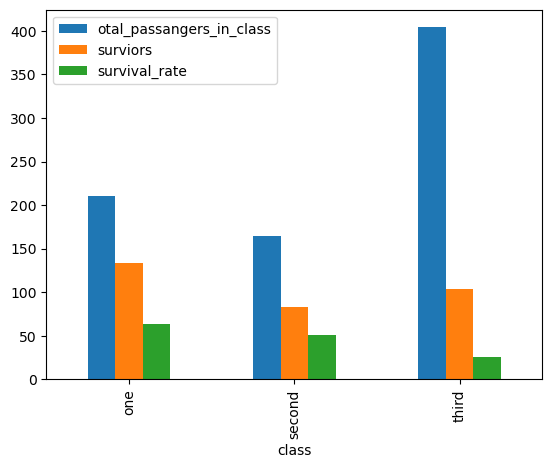

In [87]:
ax=final.plot(kind="bar")


In [88]:
df["Sex"]=df["Sex"].map({1:"Female",0:"Male"})

In [89]:
import seaborn as sns
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


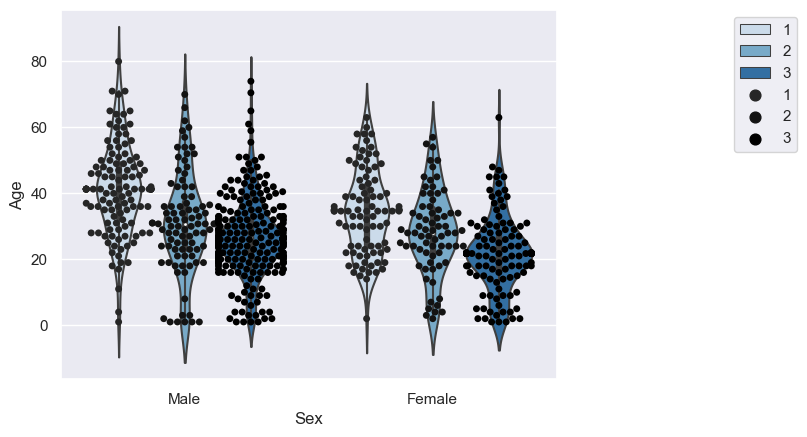

In [90]:
ax=sns.violinplot(data=df,x="Sex",y="Age",hue="Pclass",dodge=True,palette="Blues")
ax=sns.swarmplot(data=df,x="Sex",y="Age",hue="Pclass",color="black",dodge=True)
ax.legend(loc=1,bbox_to_anchor=(1.5,1.0))
plt.show()

# summary

It has started with cleaning up the data,in order to work with non-string datatypes, I encoded string typed columns like gender, embarked, and class into understandable values (0 and 1),So I chose proper data type for the rest of the columns.
I noticed that values below one in the age column make no sense then I considered 1 to be the minimum.
As soon as the whole data has been purified, it's time to use a different machine learning model,as it is obvious the chosen model should be the  classification models (survived or not!).
I divided cleaned data to test and train sets with test size of %20! I gathered all the data about accuracy of those model into a data frame, (title: comparing efficiency of different models on testing data), when it comes to comparison, logistic regression works somewhat better than the rest!
we have two plots related to the questions; now we realize that although third class was more bustling than the others, the survival rate in the first class is the highest.
